In [1]:
triangle1 = [[0,0],[0,1],[1,0]]
triangle2 = [[0,0],[1,1],[1,0]]

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import math

kmeans = KMeans(n_clusters=1)
kmeans = kmeans.fit(triangle2)
centroid = kmeans.cluster_centers_

centroid[0][1]

def polar(x, y):
    """returns r, theta(degrees)
    """
    r = (x ** 2 + y ** 2) ** .5
    if y == 0:
        theta = 180 if x < 0 else 0
    elif x == 0:
        theta = 90 if y > 0 else 270
    else:
        theta = math.degrees(math.atan(float(y) / x)) 
    return r, theta

for x in triangle2:
    print(x,'pair(xy)')
    new_x = centroid[0][0]-x[0]
    new_y = centroid[0][1]-x[1]
    
    print(new_x, new_y, 'new(x,y)')
    
    r, theta = polar(new_x,new_y)
    
    print('r =',r)
    
    if new_y < 0:
        if new_x >0:
            theta += 180
        else:
            theta += 0
    else:
        if new_x < 0:
            theta += 360
        else:
            theta += 180
            
    c = r + 1
    a = c * math.sin(theta)
    b = math.sqrt((c**2)-(a**2))
    
    print('a (new y) = ',a,'\n')
    print('b (new x) = ',b,'\n')
    print('c = ',c,'\n')
    print('theta = ',theta, '\n')
    print('\n')

    
    """
import pyclipper

subj = ((0,0),(1,0),(1,1))

pco = pyclipper.Pyclipper()
pco.AddPath(subj, )

solution = pco.Execute(5.0)

print(solution)

"""




[0, 0] pair(xy)
0.6666666666666666 0.33333333333333337 new(x,y)
r = 0.7453559924999299
a (new y) =  -1.227552307393523 

b (new x) =  1.240718692197491 

c =  1.7453559924999298 

theta =  206.565051177078 



[1, 1] pair(xy)
-0.33333333333333337 -0.6666666666666666 new(x,y)
r = 0.7453559924999299
a (new y) =  0.989956838383058 

b (new x) =  1.437446694209575 

c =  1.7453559924999298 

theta =  63.43494882292201 



[1, 0] pair(xy)
-0.33333333333333337 0.33333333333333337 new(x,y)
r = 0.47140452079103173
a (new y) =  1.0963924540615568 

b (new x) =  0.9813026294070362 

c =  1.4714045207910318 

theta =  315.0 





# New Func - CLOCKWISE

In [2]:
def clockwise(shape):

    shape = np.array(shape)

    sorted_shapeX = sorted(shape, key=lambda k: [k[0]])

    first = sorted_shapeX[0]
    last = sorted_shapeX[-1]
    midx = first[0] + (last[0] - first[0])/2.1100000000000000
    midx += .000000000001
    
    westside = []
    eastside = []

    for x in sorted_shapeX:
        if x[0] <= midx:
            westside.append(x[0:2])
        if x[0] > midx:
            eastside.append(x[0:2])

    sorted_westside = sorted(westside, key=lambda k: [k[1]])
    sorted_eastside = sorted(eastside, key=lambda k: [k[1]], reverse=True)

    clock = sorted_westside + sorted_eastside

    first = clock[0]
    second = clock[1]

    clock.extend([first, second])

    return [(i[0], i[1]) for i in clock]

In [3]:
from matplotlib import pyplot
from shapely.geometry import LineString, LinearRing, mapping
from descartes import PolygonPatch

def plot_coords(ax, x, y, color='#999999', zorder=1):
    ax.plot(x, y, 'o', color=color, zorder=zorder)

def plot_line(ax, ob,):
    parts = hasattr(ob, 'geoms') and ob or [ob]
    for part in parts:
        x, y = part.xy
        ax.plot(x, y, linewidth=3, solid_capstyle='round', zorder=1)

def set_limits(ax, x_range, y_range):
    ax.set_xlim(*x_range)
    ax.set_ylim(*y_range)
    ax.set_aspect(1)

fig = pyplot.figure(1, dpi=90)
ax = fig.add_subplot(122)
obj = LinearRing([(1,1),(2,2),(2,0),(1,0.75),(0,0),(0,2),(1,1)])

plot_line(ax, obj)

offset = obj.parallel_offset(0.5, 'left', join_style=2, mitre_limit=10.0)
plot_line(ax, offset)

mapping(offset)

{'coordinates': ((-0.5, -1.0),
  (-0.5, 3.207106781186548),
  (1.0, 1.7071067811865475),
  (2.5, 3.207106781186548),
  (2.5, -1.0),
  (1.0, 0.12499999999999992),
  (-0.5, -1.0)),
 'type': 'LineString'}

{'coordinates': ((-1.5, -1.5),
  (3.5, -1.5),
  (3.5, 2.6909830056250525),
  (2.098726524541067, 3.391619743354519),
  (1.0, 2.2928932188134525),
  (-0.09872652454106688, 3.391619743354519),
  (-1.5, 2.6909830056250525),
  (-1.5, -1.5)),
 'type': 'LineString'}

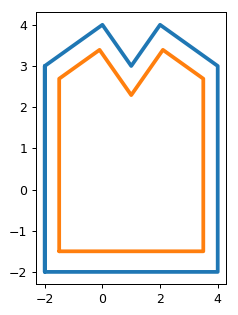

In [4]:
fig = pyplot.figure(1, dpi=90)
ax = fig.add_subplot(122)
obj = LineString([(-2,3),(-2,-2),(4,-2),(4,3),(2,4),(1,3),(0,4),(-2,3),(-2,-2)])

plot_line(ax, obj)

offset = obj.parallel_offset(0.5, 'left', join_style=2, mitre_limit=10.0)
plot_line(ax, offset)

mapping(offset)

{'coordinates': ((-2.5, 1.881966011250105),
  (-2.5, 5.207106781186548),
  (0.0, 2.707106781186548),
  (2.5, 5.207106781186548),
  (2.5, 1.881966011250105),
  (0.0, -3.118033988749895),
  (-2.5, 1.881966011250105)),
 'type': 'LineString'}

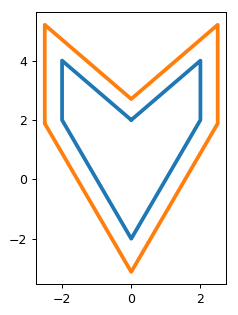

In [5]:
fig = pyplot.figure(1, dpi=90)
ax = fig.add_subplot(122)
obj = LineString ([(0,2),(2,4),(2,2),(0,-2),(-2,2),(-2,4),(0,2)])

plot_line(ax, obj)

offset = obj.parallel_offset(0.5, 'left', join_style=2, mitre_limit=10.0)
plot_line(ax,offset)

mapping(offset)

LINESTRING (2 2, 1 2, 2 3, 3 3, 2.5 2.5, 3.5 2.5, 1.5 0, 0 0, 2 2)
LINESTRING (-1.207106781186547 -0.5, 0.7928932188134524 1.5, -0.2071067811865479 1.5, 1.792893218813452 3.5, 4.207106781186548 3.5, 3.707106781186548 3, 4.540312423743285 3, 1.740312423743285 -0.5, -1.207106781186547 -0.5)


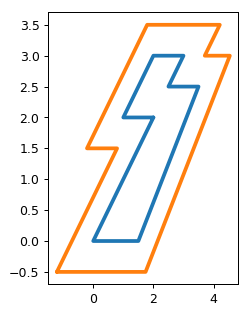

In [18]:
fig = pyplot.figure(1, dpi=90)
ax = fig.add_subplot(122)
obj = LineString ([(2,2),(1,2),(2,3),(3,3),(2.5,2.5),(3.5,2.5),(1.5,0),(0,0),(2,2)])

plot_line(ax, obj)

offset = obj.parallel_offset(0.5, 'left', join_style=2, mitre_limit=10.0)
plot_line(ax,offset)

mapping(offset)

print(obj)
print(offset)

In [5]:
x = [[2,2],[1,2],[2,3],[3,3],[2.5,2.5],[3.5,2.5],[1.5,0],[0,0],[2,2]]

def coordinate_get(x):
    return [(i[0], i[1]) for i in x]
    #out = []
    #for i in x:
    #    a=(i[0],i[1])
    #   out.append(a)
    #return out
a = coordinate_get(x)

In [8]:
""" Doesn't work because this function can only handle 4 points but it will arrange the points 
in a clockwise formation"""


# import the necessary packages
from scipy.spatial import distance as dist
import numpy as np
import cv2
 
def order_points(pts):
    # sort the points based on their x-coordinates
    xSorted = pts[np.argsort(pts[:, 0]), :]
 
    # grab the left-most and right-most points from the sorted
    # x-roodinate points
    leftMost = xSorted[:2, :]
    rightMost = xSorted[2:, :]
 
    # now, sort the left-most coordinates according to their
    # y-coordinates so we can grab the top-left and bottom-left
    # points, respectively
    leftMost = leftMost[np.argsort(leftMost[:, 1]), :]
    # (tl, bl) = leftMost # doesn't help because
     
    # now that we have the top-left coordinate, use it as an
    # anchor to calculate the Euclidean distance between the
    # top-left and right-most points; by the Pythagorean
    # theorem, the point with the largest distance will be
    # our bottom-right point
    
    # D = dist.cdist(tl[np.newaxis], rightMost, "euclidean")[0]
    D = dist.cdist(first[np.newaxis], rightMost, "euclidean")[0]
    
    # (br, tr) = rightMost[np.argsort(D)[::-1], :]
    rightMost[np.argsort(D)[::-1], :]

    # return the coordinates in top-left, top-right,
    # bottom-right, and bottom-left order

    
    return leftMost, rightMost
    # return np.array([tl, tr, br, bl], dtype="float32")
    
a = np.array(a)   
first  = a[0][0]
order_points(a)    

IndexError: too many indices for array

LINESTRING (0 0, 0 3, 3 5, 5 4, 5 0, 0 0, 0 3)
LINESTRING (-0.5 -0.5, -0.5 0, -0.5 3, -0.5 3.267591879243998, 2.964078670112243 5.576977659318826, 5.5 4.309016994374948, 5.5 -0.5, -0.5 -0.5)


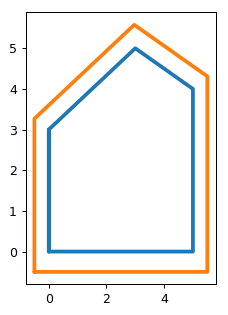

In [6]:
fig = pyplot.figure(1, dpi=90)
ax = fig.add_subplot(122)
# shape = [(2,2),(1,2),(2,3),(3,3),(2.5,2.5),(3.5,2.5),(1.5,0),(0,0),(2,2), (1,2)]
shape = [(0, 0), (5, 0), (5, 4), (3, 5), (0, 3)]
shape = clockwise(shape)
obj = LineString (shape)

plot_line(ax, obj)

offset = obj.parallel_offset(0.5, 'left', join_style=2, mitre_limit=10.0)
plot_line(ax,offset)

mapping(offset)

print(obj)
print(offset)

LINESTRING (3 0, 1 1, 2 2, 3 3, 2 4, 3 5, 4 4, 5 4, 7 4, 4 3, 5 2, 6 1, 7 0, 3 0, 1 1)
LINESTRING (6.570727505639251e-05 0.9885365697687447, 0.003882172230699754 1.088029956265868, 0.01757365063583682 1.186650657847764, 0.04100441202804128 1.283420998252277, 0.07394217556921379 1.377381644771601, 0.1160604127615223 1.46760111859647, 0.1669415844874568 1.553185029030731, 0.2260812802836034 1.633284940032947, 0.2928932188134522 1.707106781186547, 1.585786437626905 3, 1.292893218813453 3.292893218813453, 1.226989546637259 3.365606715836359, 1.168530387697452 3.444429766980402, 1.118078735651642 3.528603263174007, 1.076120467488711 3.617316567634915, 1.04305966426779 3.709715322745541, 1.019214719596769 3.804909677983876, 1.004815273327803 3.901982859670443, 1 4.000000000000004, 1.004815273327803 4.098017140329564, 1.01921471959677 4.195090322016131, 1.043059664267792 4.290284677254465, 1.076120467488714 4.382683432365091, 1.118078735651646 4.471396736825999, 1.168530387697456 4.5555702330

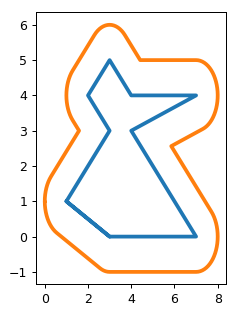

In [34]:
fig = pyplot.figure(1, dpi=90)
ax = fig.add_subplot(122)
shape = [(1, 1), (3, 0), (7, 0), (6, 1), (5, 2), (7, 4), (5, 4), (4, 3), (4, 4), (3, 5), (2, 4), (3, 3), (2, 2)]
shape = clockwise(shape)
obj = LineString (shape)

plot_line(ax, obj)

offset = obj.parallel_offset(1, 'left', join_style=1, mitre_limit=5.0)
plot_line(ax,offset)

mapping(offset)

print(obj)
print(offset)